In [1]:
import csv
from scipy import spatial,stats


In [2]:
import numpy as np

def normalize(word_vec):
    norm=np.linalg.norm(word_vec)
    if norm == 0: 
       return word_vec
    return word_vec/norm

embs = {}
with open('../2_clean_datasets/embeddings.txt', newline='') as embs_file:
    reader = csv.reader(embs_file, delimiter=' ')
    for line in reader:
        term = line[0].replace('http://dbpedia.org/resource/' , '')
        vector = normalize([float(x) for x in line[1:]])
        embs[term] = vector

In [3]:
relness = {}
with open('../2_clean_datasets/relatedness_train.tsv', newline='') as rel_file:
    reader = csv.reader(rel_file, delimiter='\t')
    for line in reader:
        t1 = line[0].replace('http://dbpedia.org/resource/' , '')
        t2 = line[1].replace('http://dbpedia.org/resource/' , '')
        rel = float(line[2])
        relness[t1] = relness.get(t1,{})
        relness[t1][t2] = rel

In [4]:
cosines = {}
for t1 in relness.keys():
    cosines[t1] = cosines.get(t1, {})
    for t2 in relness[t1].keys():
        # cosine distance is between 0 (same direction vetcors) and 2 (opposite directions)
        # but we need it between 0 (unrelated) and 1 (very related)
        cosines[t1][t2] = 1-spatial.distance.cosine(embs[t1], embs[t2])/2

In [5]:
rel_vector = []
cos_vector = []

for t1 in relness.keys():
    for t2 in relness[t1].keys():
        rel_vector.append(relness[t1][t2])
        cos_vector.append(cosines[t1][t2])
        

In [6]:
pearson = stats.pearsonr(rel_vector, cos_vector)

In [7]:
print(pearson)

(0.10087412624901906, 6.158464280930225e-30)


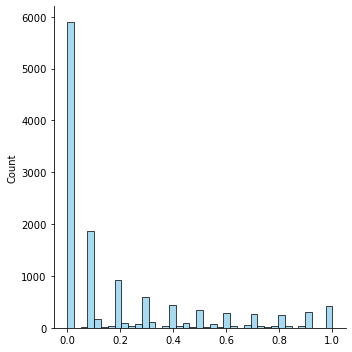

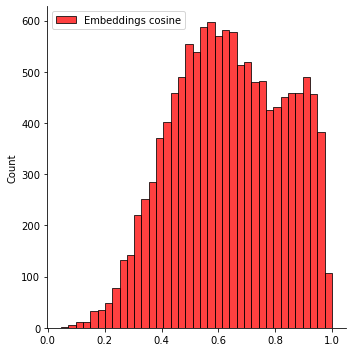

In [43]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.displot(data=rel_vector, color="skyblue", label = 'Relatedness')
sns.displot(data=cos_vector, color="red", label = 'Embeddings cosine')
plt.legend()

In [19]:
import numpy as np
from sklearn.manifold import TSNE
#X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X = list(embs.values())
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(10706, 2)

In [37]:
x = np.array(list(zip(rel_vector,cos_vector)))
x

array([[0.1       , 0.45305036],
       [0.        , 0.31021593],
       [0.        , 0.83923846],
       ...,
       [0.1       , 0.64752366],
       [0.        , 0.38033234],
       [0.4       , 0.5021424 ]])

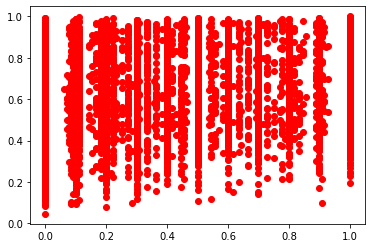

In [44]:
plt.scatter(rel_vector, cos_vector,c="r")